In [53]:
import numpy as np
import psix
from scipy.stats import pearsonr, spearmanr
from matplotlib import pyplot as plt
from time import time

## Psix turbo runtime is ~20 times faster than regular Psix

Psix turbo uses look-up tables to assign scores to each exon for each cell. As a result, it is much faster than regular Psix. 

In [67]:
psix_object_turbo = psix.Psix(psi_table = 'psix_output/psix_object/psi.tab.gz',
                        mrna_table = 'psix_output/psix_object/mrna.tab.gz')

t = time()
psix_object_turbo.run_psix(latent='data/pc3_rd.tab.gz', n_jobs=1, n_random_exons = 2000,
                     turbo='/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix_turbo/')
t_turbo = time()
print('Psix turbo total run time (one thread, 2000 random exons):')
print(str(round((t_turbo-t)/60, 2)) + ' minutes')

100%|██████████| 20/20 [00:00<00:00, 67.14it/s]

Computing cell-cell metric...



100%|██████████| 1067/1067 [00:00<00:00, 7136.67it/s]

Successfully computed cell-cell metric
Computing Psix score in 2087 exons



100%|██████████| 2087/2087 [00:10<00:00, 197.36it/s]

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [03:53<00:00,  9.33s/it]


Successfully estimated p-values
Psix turbo total run time (one thread, 2000 random exons):
4.13 minutes


In [68]:
psix_object = psix.Psix(psi_table = 'psix_output/psix_object/psi.tab.gz',
                        mrna_table = 'psix_output/psix_object/mrna.tab.gz')
t1 = time()
psix_object.run_psix(latent='data/pc3_rd.tab.gz', n_jobs=1, n_random_exons = 2000)
time_normal = time()
print('Psix total run time (one thread, 2000 random exons):')
print(str(round((time_normal-t1)/60, 2)) + ' minutes')

Computing cell-cell metric...


100%|██████████| 1067/1067 [00:00<00:00, 7062.23it/s]

Successfully computed cell-cell metric
Computing Psix score in 2087 exons



100%|██████████| 2087/2087 [04:18<00:00,  8.08it/s]

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [1:39:43<00:00, 239.34s/it]  


Successfully estimated p-values
Psix total run time (one thread, 2000 random exons):
104.09 minutes


## Multi-threading considerable speeds up Psix and Psix turbo

In [70]:
psix_object_turbo = psix.Psix(psi_table = 'psix_output/psix_object/psi.tab.gz',
                        mrna_table = 'psix_output/psix_object/mrna.tab.gz')

t = time()
psix_object_turbo.run_psix(latent='data/pc3_rd.tab.gz', n_jobs=25, n_random_exons = 2000,
                     turbo='/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/psix_turbo/')
t_turbo = time()
print('Psix turbo total run time (one thread, 2000 random exons):')
print(str(round((t_turbo-t)/60, 2)) + ' minutes')

100%|██████████| 20/20 [00:00<00:00, 60.47it/s]

Computing cell-cell metric...



100%|██████████| 1067/1067 [00:00<00:00, 5548.59it/s]

Successfully computed cell-cell metric
Computing Psix score in 2087 exons



100%|██████████| 2087/2087 [00:02<00:00, 874.56it/s]


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [00:22<00:00,  1.14it/s]


Successfully estimated p-values
Psix turbo total run time (one thread, 2000 random exons):
0.49 minutes


In [71]:
psix_object = psix.Psix(psi_table = 'psix_output/psix_object/psi.tab.gz',
                        mrna_table = 'psix_output/psix_object/mrna.tab.gz')
t1 = time()
psix_object.run_psix(latent='data/pc3_rd.tab.gz', n_jobs=25, n_random_exons = 2000)
time_normal = time()
print('Psix total run time (one thread, 2000 random exons):')
print(str(round((time_normal-t1)/60, 2)) + ' minutes')

Computing cell-cell metric...


100%|██████████| 1067/1067 [00:00<00:00, 6948.86it/s]

Successfully computed cell-cell metric
Computing Psix score in 2087 exons



100%|██████████| 2087/2087 [00:17<00:00, 121.68it/s]

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [08:31<00:00, 20.47s/it]  


Successfully estimated p-values
Psix total run time (one thread, 2000 random exons):
8.9 minutes


## Score correlation

Psix turbo comes with a slight penaty on score accuracy. Psix turbo has a maximum cap in the number of mRNAs that it considers per observation; by default, 20 mRNAs. Any observation with more than 20 mRNAs (or another assigned cap) will be considered as having 20 mRNAs. As a result, the score in some exons will deviate from the score of regular Psix. Nonetheless, the scores are highly correlated, with the set of significant exons very similar.

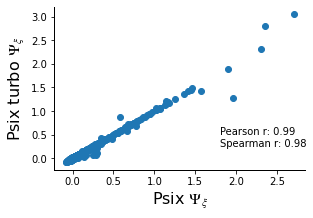

In [64]:
fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_subplot(111)
ax.scatter(psix_object.psix_results.psix_score, 
            psix_object_turbo.psix_results.loc[psix_object.psix_results.psix_score.index].psix_score)

pr = round(pearsonr(psix_object.psix_results.psix_score, 
            psix_object_turbo.psix_results.loc[psix_object.psix_results.psix_score.index].psix_score)[0], 2)
sr = round(spearmanr(psix_object.psix_results.psix_score, 
            psix_object_turbo.psix_results.loc[psix_object.psix_results.psix_score.index].psix_score)[0], 2)

plt.text(1.8, 0.5, 'Pearson r: ' + str(pr))
plt.text(1.8, 0.25, 'Spearman r: ' + str(sr))


ax.set_xlabel(r'Psix $\Psi_\xi$', size=16)
ax.set_ylabel(r'Psix turbo $\Psi_\xi$', size=16)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#### Overlap of significant exons

In [66]:
from sklearn.metrics import jaccard_score
jaccard_score(psix_object.psix_results.qvals < 0.05, 
              psix_object_turbo.psix_results.loc[psix_object.psix_results.index].qvals < 0.05)

0.8849449204406364